# Exploratory Data analysis - EDA

In [149]:
# Importar liberías

import pandas as pd
import os

In [150]:
print(os.getcwd())

c:\Users\GrhgG\OneDrive\Documents\GitHub\final_project\src


In [151]:
df7 = pd.read_csv('../data/raw/Afluencia plazas (1).csv', encoding='latin1')
df7.fillna(0, inplace=True)
meses = {'ene': 1, 'feb': 2, 'mar': 3, 'abr': 4, 'may': 5, 'jun': 6,
         'jul': 7, 'ago': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dic': 12}

df7['mes'] = df7['Fecha'].str[:3].map(meses)
df7['año'] = '20' + df7['Fecha'].str[-2:]
cols_k = ['Interlomas', 'Pabellón Bosques', 'Oceanía', 'Samara']

def convertir_k(valor):
    if isinstance(valor, str) and 'k' in valor:
        return int(valor.replace('k', '').replace(',', '')) * 1000
    try:
        return int(valor)
    except:
        return valor  # No modifica fechas ni otros valores

for col in cols_k:
    if col in df7.columns:
        df7[col] = df7[col].apply(convertir_k)
df7.head()

,Fecha,Interlomas,Pabellón Bosques,Oceanía,Samara,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,mes,año
0,ene-24,850000,0,1371000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2024
1,feb-24,850000,0,1263000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2024
2,mar-24,850000,0,1400000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2024
3,abr-24,850000,0,1231000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2024
4,may-24,850000,0,1291000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2024


In [152]:
# Cargar insumos

df1 = pd.read_csv('../data/raw/encuentro_oceania_2024.csv', encoding='latin1', sep='\t')
df1.head()


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc
0,1,30/12/2024,1.0,271,"22,769.4","3,643.1","26,412.5",97.46309963,85,310.73529412
1,2,29/12/2024,7.0,786,"80,439.665","12,870.335","93,310",118.71501272,143,652.51748252
2,3,28/12/2024,6.0,620,"67,399.1359","10,783.8641","78,183",126.1016129,114,685.81578947
3,4,27/12/2024,5.0,492,"40,806.8961","6,529.1039","47,336",96.21138211,103,459.57281553
4,5,26/12/2024,4.0,224,"19,525.0008","3,123.9992","22,649",101.11160714,65,348.44615385


In [153]:
df1['mes'] = pd.to_datetime(df1['Fecha']).dt.month
df1['año'] = pd.to_datetime(df1['Fecha']).dt.year
df1.head()  


C:\Users\GrhgG\AppData\Local\Temp\ipykernel_18932\1569150887.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['mes'] = pd.to_datetime(df1['Fecha']).dt.month
C:\Users\GrhgG\AppData\Local\Temp\ipykernel_18932\1569150887.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['año'] = pd.to_datetime(df1['Fecha']).dt.year


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año
0,1,30/12/2024,1.0,271,"22,769.4","3,643.1","26,412.5",97.46309963,85,310.73529412,12.0,2024.0
1,2,29/12/2024,7.0,786,"80,439.665","12,870.335","93,310",118.71501272,143,652.51748252,12.0,2024.0
2,3,28/12/2024,6.0,620,"67,399.1359","10,783.8641","78,183",126.1016129,114,685.81578947,12.0,2024.0
3,4,27/12/2024,5.0,492,"40,806.8961","6,529.1039","47,336",96.21138211,103,459.57281553,12.0,2024.0
4,5,26/12/2024,4.0,224,"19,525.0008","3,123.9992","22,649",101.11160714,65,348.44615385,12.0,2024.0


In [154]:
df7['mes'] = df7['mes'].astype(str)
df7['año'] = df7['año'].astype(str)
df7['mes_año'] = df7['mes'] + '-' + df7['año']

df1['mes_año'] = df1['mes'].astype(str) + '-' + df1['año'].astype(str)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df1 = df1.merge(df7[['mes_año', 'Oceanía']].rename(columns={'Oceanía': 'afluencia'}), on='mes_año', how='left')

if 'Oceanía' in df1.columns:
    df1.drop(columns=['Oceanía'], inplace=True)

df1.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,271,"22,769.4","3,643.1","26,412.5",97.46309963,85,310.73529412,12.0,2024.0,12.0-2024.0,NaN
1,2,29/12/2024,7.0,786,"80,439.665","12,870.335","93,310",118.71501272,143,652.51748252,12.0,2024.0,12.0-2024.0,NaN
2,3,28/12/2024,6.0,620,"67,399.1359","10,783.8641","78,183",126.1016129,114,685.81578947,12.0,2024.0,12.0-2024.0,NaN
3,4,27/12/2024,5.0,492,"40,806.8961","6,529.1039","47,336",96.21138211,103,459.57281553,12.0,2024.0,12.0-2024.0,NaN
4,5,26/12/2024,4.0,224,"19,525.0008","3,123.9992","22,649",101.11160714,65,348.44615385,12.0,2024.0,12.0-2024.0,NaN


In [155]:
df1['afluencia'] = df1['afluencia'].fillna(
    df1['mes_año'].map(df7.set_index('mes_año')['Oceanía'])
)

df1.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,271,"22,769.4","3,643.1","26,412.5",97.46309963,85,310.73529412,12.0,2024.0,12.0-2024.0,NaN
1,2,29/12/2024,7.0,786,"80,439.665","12,870.335","93,310",118.71501272,143,652.51748252,12.0,2024.0,12.0-2024.0,NaN
2,3,28/12/2024,6.0,620,"67,399.1359","10,783.8641","78,183",126.1016129,114,685.81578947,12.0,2024.0,12.0-2024.0,NaN
3,4,27/12/2024,5.0,492,"40,806.8961","6,529.1039","47,336",96.21138211,103,459.57281553,12.0,2024.0,12.0-2024.0,NaN
4,5,26/12/2024,4.0,224,"19,525.0008","3,123.9992","22,649",101.11160714,65,348.44615385,12.0,2024.0,12.0-2024.0,NaN


In [156]:
sin_afluencia = df1[df1['afluencia'].isna()]
print(sin_afluencia[['mes_año']])

         mes_año
0    12.0-2024.0
1    12.0-2024.0
2    12.0-2024.0
3    12.0-2024.0
4    12.0-2024.0
..           ...
333   1.0-2024.0
334   1.0-2024.0
335   1.0-2024.0
336   1.0-2024.0
337      nan-nan

[338 rows x 1 columns]


In [157]:
df1['mes'] = df1['mes'].fillna(1).astype(int)
df1['año'] = df1['año'].fillna(2024).astype(int)
df1['mes_año'] = df1['mes'].astype(str) + '-' + df1['año'].astype(str)

df7['mes'] = df7['mes'].fillna(1).astype(int)
df7['año'] = df7['año'].fillna(2024).astype(int)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df1['afluencia'] = df1['afluencia'].fillna(
    df1['mes_año'].map(df7.set_index('mes_año')['Oceanía'])
)

df1.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,271,"22,769.4","3,643.1","26,412.5",97.46309963,85,310.73529412,12,2024,12-2024,1696000.0
1,2,29/12/2024,7.0,786,"80,439.665","12,870.335","93,310",118.71501272,143,652.51748252,12,2024,12-2024,1696000.0
2,3,28/12/2024,6.0,620,"67,399.1359","10,783.8641","78,183",126.1016129,114,685.81578947,12,2024,12-2024,1696000.0
3,4,27/12/2024,5.0,492,"40,806.8961","6,529.1039","47,336",96.21138211,103,459.57281553,12,2024,12-2024,1696000.0
4,5,26/12/2024,4.0,224,"19,525.0008","3,123.9992","22,649",101.11160714,65,348.44615385,12,2024,12-2024,1696000.0


In [158]:
df2 = pd.read_csv('../data/raw/encuentro_oceania_2025.csv', encoding='latin1', sep='\t')
df2.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc
0,1,31/08/2025,7.0,106,"13,762.93","2,202.07","15,965",150.613208,33,483.78787879
1,2,30/08/2025,6.0,690,"74,202.12","11,872.38","86,074.5",124.745652,149,577.68120805
2,3,29/08/2025,5.0,517,"42,157.87","6,745.13","48,903",94.589942,111,440.56756757
3,4,28/08/2025,4.0,781,"58,941.35","9,430.55","68,371.9",87.544046,174,392.94195402
4,5,27/08/2025,3.0,857,"55,538.92","8,886.28","64,425.2",75.175263,199,323.74472362


In [159]:
df2['mes'] = pd.to_datetime(df2['Fecha']).dt.month
df2['año'] = pd.to_datetime(df2['Fecha']).dt.year
df2.head()

C:\Users\GrhgG\AppData\Local\Temp\ipykernel_18932\1351950684.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['mes'] = pd.to_datetime(df2['Fecha']).dt.month
C:\Users\GrhgG\AppData\Local\Temp\ipykernel_18932\1351950684.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['año'] = pd.to_datetime(df2['Fecha']).dt.year


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año
0,1,31/08/2025,7.0,106,"13,762.93","2,202.07","15,965",150.613208,33,483.78787879,8.0,2025.0
1,2,30/08/2025,6.0,690,"74,202.12","11,872.38","86,074.5",124.745652,149,577.68120805,8.0,2025.0
2,3,29/08/2025,5.0,517,"42,157.87","6,745.13","48,903",94.589942,111,440.56756757,8.0,2025.0
3,4,28/08/2025,4.0,781,"58,941.35","9,430.55","68,371.9",87.544046,174,392.94195402,8.0,2025.0
4,5,27/08/2025,3.0,857,"55,538.92","8,886.28","64,425.2",75.175263,199,323.74472362,8.0,2025.0


In [160]:
df2['mes_año'] = df2['mes'].astype(str) + '-' + df2['año'].astype(str)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df2 = df2.merge(df7[['mes_año', 'Oceanía']].rename(columns={'Oceanía': 'afluencia'}), on='mes_año', how='left')

if 'Oceanía' in df2.columns:
    df2.drop(columns=['Oceanía'], inplace=True)

df2.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,106,"13,762.93","2,202.07","15,965",150.613208,33,483.78787879,8.0,2025.0,8.0-2025.0,NaN
1,2,30/08/2025,6.0,690,"74,202.12","11,872.38","86,074.5",124.745652,149,577.68120805,8.0,2025.0,8.0-2025.0,NaN
2,3,29/08/2025,5.0,517,"42,157.87","6,745.13","48,903",94.589942,111,440.56756757,8.0,2025.0,8.0-2025.0,NaN
3,4,28/08/2025,4.0,781,"58,941.35","9,430.55","68,371.9",87.544046,174,392.94195402,8.0,2025.0,8.0-2025.0,NaN
4,5,27/08/2025,3.0,857,"55,538.92","8,886.28","64,425.2",75.175263,199,323.74472362,8.0,2025.0,8.0-2025.0,NaN


In [161]:
df2['mes'] = df2['mes'].fillna(1).astype(int)
df2['año'] = df2['año'].fillna(2024).astype(int)
df2['mes_año'] = df2['mes'].astype(str) + '-' + df2['año'].astype(str)

df2['afluencia'] = df2['afluencia'].fillna(
    df2['mes_año'].map(df7.set_index('mes_año')['Oceanía'])
)

df2.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,106,"13,762.93","2,202.07","15,965",150.613208,33,483.78787879,8,2025,8-2025,1520000.0
1,2,30/08/2025,6.0,690,"74,202.12","11,872.38","86,074.5",124.745652,149,577.68120805,8,2025,8-2025,1520000.0
2,3,29/08/2025,5.0,517,"42,157.87","6,745.13","48,903",94.589942,111,440.56756757,8,2025,8-2025,1520000.0
3,4,28/08/2025,4.0,781,"58,941.35","9,430.55","68,371.9",87.544046,174,392.94195402,8,2025,8-2025,1520000.0
4,5,27/08/2025,3.0,857,"55,538.92","8,886.28","64,425.2",75.175263,199,323.74472362,8,2025,8-2025,1520000.0


In [162]:
df3 = pd.read_csv('../data/raw/interlomas_2024.csv', encoding='latin1', sep='\t')
df3.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc
0,1,30/12/2024,1.0,285,"24,214.6755","3,874.3245","28,089",98.55789474,66,425.59090909
1,2,29/12/2024,7.0,428,"28,986.203","4,637.797","33,624",78.56074766,63,533.71428571
2,3,28/12/2024,6.0,388,"52,072.1531","8,331.5469","60,403.7",155.67963918,55,"1,098.24909091"
3,4,27/12/2024,5.0,552,"44,366.2227","7,098.5773","51,464.8",93.23333333,84,612.67619048
4,5,26/12/2024,4.0,563,"49,370.1762","7,899.2238","57,269.4",101.72184725,90,636.32666667


In [163]:
df3['mes'] = pd.to_datetime(df3['Fecha']).dt.month
df3['año'] = pd.to_datetime(df3['Fecha']).dt.year

df3.head()

C:\Users\GrhgG\AppData\Local\Temp\ipykernel_18932\820475709.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df3['mes'] = pd.to_datetime(df3['Fecha']).dt.month
C:\Users\GrhgG\AppData\Local\Temp\ipykernel_18932\820475709.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df3['año'] = pd.to_datetime(df3['Fecha']).dt.year


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año
0,1,30/12/2024,1.0,285,"24,214.6755","3,874.3245","28,089",98.55789474,66,425.59090909,12.0,2024.0
1,2,29/12/2024,7.0,428,"28,986.203","4,637.797","33,624",78.56074766,63,533.71428571,12.0,2024.0
2,3,28/12/2024,6.0,388,"52,072.1531","8,331.5469","60,403.7",155.67963918,55,"1,098.24909091",12.0,2024.0
3,4,27/12/2024,5.0,552,"44,366.2227","7,098.5773","51,464.8",93.23333333,84,612.67619048,12.0,2024.0
4,5,26/12/2024,4.0,563,"49,370.1762","7,899.2238","57,269.4",101.72184725,90,636.32666667,12.0,2024.0


In [164]:
df3['mes_año'] = df3['mes'].astype(str) + '-' + df3['año'].astype(str)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df3 = df3.merge(df7[['mes_año', 'Interlomas']].rename(columns={'Interlomas': 'afluencia'}), on='mes_año', how='left')

if 'Interlomas' in df3.columns:
    df3.drop(columns=['Interlomas'], inplace=True)

df3.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,285,"24,214.6755","3,874.3245","28,089",98.55789474,66,425.59090909,12.0,2024.0,12.0-2024.0,NaN
1,2,29/12/2024,7.0,428,"28,986.203","4,637.797","33,624",78.56074766,63,533.71428571,12.0,2024.0,12.0-2024.0,NaN
2,3,28/12/2024,6.0,388,"52,072.1531","8,331.5469","60,403.7",155.67963918,55,"1,098.24909091",12.0,2024.0,12.0-2024.0,NaN
3,4,27/12/2024,5.0,552,"44,366.2227","7,098.5773","51,464.8",93.23333333,84,612.67619048,12.0,2024.0,12.0-2024.0,NaN
4,5,26/12/2024,4.0,563,"49,370.1762","7,899.2238","57,269.4",101.72184725,90,636.32666667,12.0,2024.0,12.0-2024.0,NaN


In [165]:
df3['mes'] = df3['mes'].fillna(1).astype(int)
df3['año'] = df3['año'].fillna(2024).astype(int)
df3['mes_año'] = df3['mes'].astype(str) + '-' + df3['año'].astype(str)

df3['afluencia'] = df3['afluencia'].fillna(
    df3['mes_año'].map(df7.set_index('mes_año')['Interlomas'])
)

df3.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,285,"24,214.6755","3,874.3245","28,089",98.55789474,66,425.59090909,12,2024,12-2024,889000.0
1,2,29/12/2024,7.0,428,"28,986.203","4,637.797","33,624",78.56074766,63,533.71428571,12,2024,12-2024,889000.0
2,3,28/12/2024,6.0,388,"52,072.1531","8,331.5469","60,403.7",155.67963918,55,"1,098.24909091",12,2024,12-2024,889000.0
3,4,27/12/2024,5.0,552,"44,366.2227","7,098.5773","51,464.8",93.23333333,84,612.67619048,12,2024,12-2024,889000.0
4,5,26/12/2024,4.0,563,"49,370.1762","7,899.2238","57,269.4",101.72184725,90,636.32666667,12,2024,12-2024,889000.0


In [166]:
df4 = pd.read_csv('../data/raw/interlomas_2025.csv', encoding='latin1', sep='\t')
df4.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc
0,1,31/08/2025,7.0,97,"19,551.73","3,128.27","22,680",233.81443299,19,"1,193.68421053"
1,2,30/08/2025,6.0,713,"100,620.07","16,099.18","116,719.25",163.7016129,113,"1,032.91371681"
2,3,29/08/2025,5.0,378,"102,622.2","16,419.55","119,041.75",314.92526455,86,"1,384.20639535"
3,4,28/08/2025,4.0,319,"52,288.8","8,366.2","60,655",190.14106583,92,659.29347826
4,5,27/08/2025,3.0,369,"40,424.16","6,467.84","46,892",127.07859079,85,551.67058824


In [181]:
df4['mes'] = pd.to_datetime(df4['Fecha']).dt.month
df4['año'] = pd.to_datetime(df4['Fecha']).dt.year
df4.head()

C:\Users\GrhgG\AppData\Local\Temp\ipykernel_18932\3593088143.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df4['mes'] = pd.to_datetime(df4['Fecha']).dt.month
C:\Users\GrhgG\AppData\Local\Temp\ipykernel_18932\3593088143.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df4['año'] = pd.to_datetime(df4['Fecha']).dt.year


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,Interlomas
0,1,31/08/2025,7.0,97,"19,551.73","3,128.27","22,680",233.81443299,19,"1,193.68421053",8.0,2025.0,8.0-2025.0,NaN
1,2,30/08/2025,6.0,713,"100,620.07","16,099.18","116,719.25",163.7016129,113,"1,032.91371681",8.0,2025.0,8.0-2025.0,NaN
2,3,29/08/2025,5.0,378,"102,622.2","16,419.55","119,041.75",314.92526455,86,"1,384.20639535",8.0,2025.0,8.0-2025.0,NaN
3,4,28/08/2025,4.0,319,"52,288.8","8,366.2","60,655",190.14106583,92,659.29347826,8.0,2025.0,8.0-2025.0,NaN
4,5,27/08/2025,3.0,369,"40,424.16","6,467.84","46,892",127.07859079,85,551.67058824,8.0,2025.0,8.0-2025.0,NaN


In [182]:
df4['mes_año'] = df4['mes'].astype(str) + '-' + df4['año'].astype(str)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df4 = df4.merge(df7[['mes_año', 'Interlomas']].rename(columns={'Interlomas': 'afluencia'}), on='mes_año', how='left')

if 'Interlomas' in df4.columns:
    df4.drop(columns=['Interlomas'], inplace=True)

df4.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,97,"19,551.73","3,128.27","22,680",233.81443299,19,"1,193.68421053",8.0,2025.0,8.0-2025.0,NaN
1,2,30/08/2025,6.0,713,"100,620.07","16,099.18","116,719.25",163.7016129,113,"1,032.91371681",8.0,2025.0,8.0-2025.0,NaN
2,3,29/08/2025,5.0,378,"102,622.2","16,419.55","119,041.75",314.92526455,86,"1,384.20639535",8.0,2025.0,8.0-2025.0,NaN
3,4,28/08/2025,4.0,319,"52,288.8","8,366.2","60,655",190.14106583,92,659.29347826,8.0,2025.0,8.0-2025.0,NaN
4,5,27/08/2025,3.0,369,"40,424.16","6,467.84","46,892",127.07859079,85,551.67058824,8.0,2025.0,8.0-2025.0,NaN


In [184]:
df4['mes'] = df4['mes'].fillna(1).astype(int)
df4['año'] = df4['año'].fillna(2024).astype(int)
df4['mes_año'] = df4['mes'].astype(str) + '-' + df4['año'].astype(str)

df4['afluencia'] = df4['afluencia'].fillna(
    df4['mes_año'].map(df7.set_index('mes_año')['Interlomas'])
)

df4.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,97,"19,551.73","3,128.27","22,680",233.81443299,19,"1,193.68421053",8,2025,8-2025,855000.0
1,2,30/08/2025,6.0,713,"100,620.07","16,099.18","116,719.25",163.7016129,113,"1,032.91371681",8,2025,8-2025,855000.0
2,3,29/08/2025,5.0,378,"102,622.2","16,419.55","119,041.75",314.92526455,86,"1,384.20639535",8,2025,8-2025,855000.0
3,4,28/08/2025,4.0,319,"52,288.8","8,366.2","60,655",190.14106583,92,659.29347826,8,2025,8-2025,855000.0
4,5,27/08/2025,3.0,369,"40,424.16","6,467.84","46,892",127.07859079,85,551.67058824,8,2025,8-2025,855000.0


In [168]:
df5 = pd.read_csv('../data/raw/pabellon_2025.csv', encoding='latin1', sep='\t')
df5.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc
0,1,31/08/2025,7.0,142,"28,607.75","4,577.25","33,185",233.697183,39,850.8974359
1,2,30/08/2025,6.0,507,"146,172.42","23,387.58","169,560",334.437870,78,"2,173.84615385"
2,3,29/08/2025,5.0,571,"73,981.06","11,836.94","85,818",150.294221,96,893.9375
3,4,28/08/2025,4.0,572,"87,983.26","14,077.34","102,060.6",178.427622,107,953.83738318
4,5,27/08/2025,3.0,458,"52,229.39","8,356.61","60,586",132.283843,87,696.3908046


In [185]:
df5['mes'] = pd.to_datetime(df5['Fecha']).dt.month
df5['año'] = pd.to_datetime(df5['Fecha']).dt.year
df5.head()

C:\Users\GrhgG\AppData\Local\Temp\ipykernel_18932\868962788.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df5['mes'] = pd.to_datetime(df5['Fecha']).dt.month
C:\Users\GrhgG\AppData\Local\Temp\ipykernel_18932\868962788.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df5['año'] = pd.to_datetime(df5['Fecha']).dt.year


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,Pabellón Bosques
0,1,31/08/2025,7.0,142,"28,607.75","4,577.25","33,185",233.697183,39,850.8974359,8.0,2025.0,8.0-2025.0,NaN
1,2,30/08/2025,6.0,507,"146,172.42","23,387.58","169,560",334.437870,78,"2,173.84615385",8.0,2025.0,8.0-2025.0,NaN
2,3,29/08/2025,5.0,571,"73,981.06","11,836.94","85,818",150.294221,96,893.9375,8.0,2025.0,8.0-2025.0,NaN
3,4,28/08/2025,4.0,572,"87,983.26","14,077.34","102,060.6",178.427622,107,953.83738318,8.0,2025.0,8.0-2025.0,NaN
4,5,27/08/2025,3.0,458,"52,229.39","8,356.61","60,586",132.283843,87,696.3908046,8.0,2025.0,8.0-2025.0,NaN


In [186]:
df5['mes_año'] = df5['mes'].astype(str) + '-' + df5['año'].astype(str)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df5 = df5.merge(df7[['mes_año', 'Pabellón Bosques']].rename(columns={'Pabellón Bosques': 'afluencia'}), on='mes_año', how='left')

if 'Pabellón Bosques' in df5.columns:
    df5.drop(columns=['Pabellón Bosques'], inplace=True)

df5.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,142,"28,607.75","4,577.25","33,185",233.697183,39,850.8974359,8.0,2025.0,8.0-2025.0,NaN
1,2,30/08/2025,6.0,507,"146,172.42","23,387.58","169,560",334.437870,78,"2,173.84615385",8.0,2025.0,8.0-2025.0,NaN
2,3,29/08/2025,5.0,571,"73,981.06","11,836.94","85,818",150.294221,96,893.9375,8.0,2025.0,8.0-2025.0,NaN
3,4,28/08/2025,4.0,572,"87,983.26","14,077.34","102,060.6",178.427622,107,953.83738318,8.0,2025.0,8.0-2025.0,NaN
4,5,27/08/2025,3.0,458,"52,229.39","8,356.61","60,586",132.283843,87,696.3908046,8.0,2025.0,8.0-2025.0,NaN


In [187]:
df5['mes'] = df5['mes'].fillna(1).astype(int)
df5['año'] = df5['año'].fillna(2024).astype(int)
df5['mes_año'] = df5['mes'].astype(str) + '-' + df5['año'].astype(str)

df5['afluencia'] = df5['afluencia'].fillna(
    df5['mes_año'].map(df7.set_index('mes_año')['Pabellón Bosques'])
)

df5.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,142,"28,607.75","4,577.25","33,185",233.697183,39,850.8974359,8,2025,8-2025,271000.0
1,2,30/08/2025,6.0,507,"146,172.42","23,387.58","169,560",334.437870,78,"2,173.84615385",8,2025,8-2025,271000.0
2,3,29/08/2025,5.0,571,"73,981.06","11,836.94","85,818",150.294221,96,893.9375,8,2025,8-2025,271000.0
3,4,28/08/2025,4.0,572,"87,983.26","14,077.34","102,060.6",178.427622,107,953.83738318,8,2025,8-2025,271000.0
4,5,27/08/2025,3.0,458,"52,229.39","8,356.61","60,586",132.283843,87,696.3908046,8,2025,8-2025,271000.0


In [170]:
df6 = pd.read_csv('../data/raw/satelite_2025.csv', encoding='latin1', sep='\t')
df6.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc
0,1,31/08/2025,7.0,133,"24,222.39","3,875.61","28,098",211.263158,34,826.41176471
1,2,30/08/2025,6.0,590,"80,663.74","12,906.26","93,570",158.593220,124,754.59677419
2,3,29/08/2025,5.0,822,"102,779.35","16,444.65","119,224",145.041363,153,779.24183007
3,4,28/08/2025,4.0,960,"68,409.74","10,945.56","79,355.3",82.661771,135,587.81703704
4,5,27/08/2025,3.0,803,"88,655.16","14,184.84","102,840",128.069738,169,608.52071006


In [188]:
df6['mes'] = pd.to_datetime(df6['Fecha']).dt.month
df6['año'] = pd.to_datetime(df6['Fecha']).dt.year
df6.head()

C:\Users\GrhgG\AppData\Local\Temp\ipykernel_18932\263753723.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df6['mes'] = pd.to_datetime(df6['Fecha']).dt.month
C:\Users\GrhgG\AppData\Local\Temp\ipykernel_18932\263753723.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df6['año'] = pd.to_datetime(df6['Fecha']).dt.year


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,Samara
0,1,31/08/2025,7.0,133,"24,222.39","3,875.61","28,098",211.263158,34,826.41176471,8.0,2025.0,8.0-2025.0,NaN
1,2,30/08/2025,6.0,590,"80,663.74","12,906.26","93,570",158.593220,124,754.59677419,8.0,2025.0,8.0-2025.0,NaN
2,3,29/08/2025,5.0,822,"102,779.35","16,444.65","119,224",145.041363,153,779.24183007,8.0,2025.0,8.0-2025.0,NaN
3,4,28/08/2025,4.0,960,"68,409.74","10,945.56","79,355.3",82.661771,135,587.81703704,8.0,2025.0,8.0-2025.0,NaN
4,5,27/08/2025,3.0,803,"88,655.16","14,184.84","102,840",128.069738,169,608.52071006,8.0,2025.0,8.0-2025.0,NaN


In [189]:
df6['mes_año'] = df6['mes'].astype(str) + '-' + df6['año'].astype(str)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df6 = df6.merge(df7[['mes_año', 'Samara']].rename(columns={'Samara': 'afluencia'}), on='mes_año', how='left')

if 'Samara' in df6.columns:
    df6.drop(columns=['Samara'], inplace=True)

df6.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,133,"24,222.39","3,875.61","28,098",211.263158,34,826.41176471,8.0,2025.0,8.0-2025.0,NaN
1,2,30/08/2025,6.0,590,"80,663.74","12,906.26","93,570",158.593220,124,754.59677419,8.0,2025.0,8.0-2025.0,NaN
2,3,29/08/2025,5.0,822,"102,779.35","16,444.65","119,224",145.041363,153,779.24183007,8.0,2025.0,8.0-2025.0,NaN
3,4,28/08/2025,4.0,960,"68,409.74","10,945.56","79,355.3",82.661771,135,587.81703704,8.0,2025.0,8.0-2025.0,NaN
4,5,27/08/2025,3.0,803,"88,655.16","14,184.84","102,840",128.069738,169,608.52071006,8.0,2025.0,8.0-2025.0,NaN


In [191]:
df6['mes'] = df6['mes'].fillna(1).astype(int)
df6['año'] = df6['año'].fillna(2024).astype(int)
df6['mes_año'] = df6['mes'].astype(str) + '-' + df6['año'].astype(str)

df6['afluencia'] = df6['afluencia'].fillna(
    df6['mes_año'].map(df7.set_index('mes_año')['Samara'])
)

df6.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,133,"24,222.39","3,875.61","28,098",211.263158,34,826.41176471,8,2025,8-2025,281000.0
1,2,30/08/2025,6.0,590,"80,663.74","12,906.26","93,570",158.593220,124,754.59677419,8,2025,8-2025,281000.0
2,3,29/08/2025,5.0,822,"102,779.35","16,444.65","119,224",145.041363,153,779.24183007,8,2025,8-2025,281000.0
3,4,28/08/2025,4.0,960,"68,409.74","10,945.56","79,355.3",82.661771,135,587.81703704,8,2025,8-2025,281000.0
4,5,27/08/2025,3.0,803,"88,655.16","14,184.84","102,840",128.069738,169,608.52071006,8,2025,8-2025,281000.0


In [192]:
df_total = pd.concat([df1, df2, df3, df4, df5, df6], axis=0, ignore_index=True)
df_total.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,271,"22,769.4","3,643.1","26,412.5",97.46309963,85,310.73529412,12,2024,12-2024,1696000.0
1,2,29/12/2024,7.0,786,"80,439.665","12,870.335","93,310",118.71501272,143,652.51748252,12,2024,12-2024,1696000.0
2,3,28/12/2024,6.0,620,"67,399.1359","10,783.8641","78,183",126.1016129,114,685.81578947,12,2024,12-2024,1696000.0
3,4,27/12/2024,5.0,492,"40,806.8961","6,529.1039","47,336",96.21138211,103,459.57281553,12,2024,12-2024,1696000.0
4,5,26/12/2024,4.0,224,"19,525.0008","3,123.9992","22,649",101.11160714,65,348.44615385,12,2024,12-2024,1696000.0


In [193]:
df_total.duplicated().sum()


np.int64(0)

In [194]:
print("df_total:", df_total.isnull().sum().sum())

df_total: 12


In [198]:
df_total.dropna(inplace=True)

df_total.head()

,Unnamed: 0,Fecha,Día de la Semana,Neto,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,"26,412.5",12,2024,12-2024,1696000.0
1,2,29/12/2024,7.0,"93,310",12,2024,12-2024,1696000.0
2,3,28/12/2024,6.0,"78,183",12,2024,12-2024,1696000.0
3,4,27/12/2024,5.0,"47,336",12,2024,12-2024,1696000.0
4,5,26/12/2024,4.0,"22,649",12,2024,12-2024,1696000.0


In [199]:
cols_to_drop = ['Uds.V','Base','Impuestos','Venta/Uds','Docs','Venta/Doc']
df_total.drop([col for col in cols_to_drop if col in df_total.columns], axis=1, inplace=True)
df_total.head()

,Unnamed: 0,Fecha,Día de la Semana,Neto,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,"26,412.5",12,2024,12-2024,1696000.0
1,2,29/12/2024,7.0,"93,310",12,2024,12-2024,1696000.0
2,3,28/12/2024,6.0,"78,183",12,2024,12-2024,1696000.0
3,4,27/12/2024,5.0,"47,336",12,2024,12-2024,1696000.0
4,5,26/12/2024,4.0,"22,649",12,2024,12-2024,1696000.0


In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

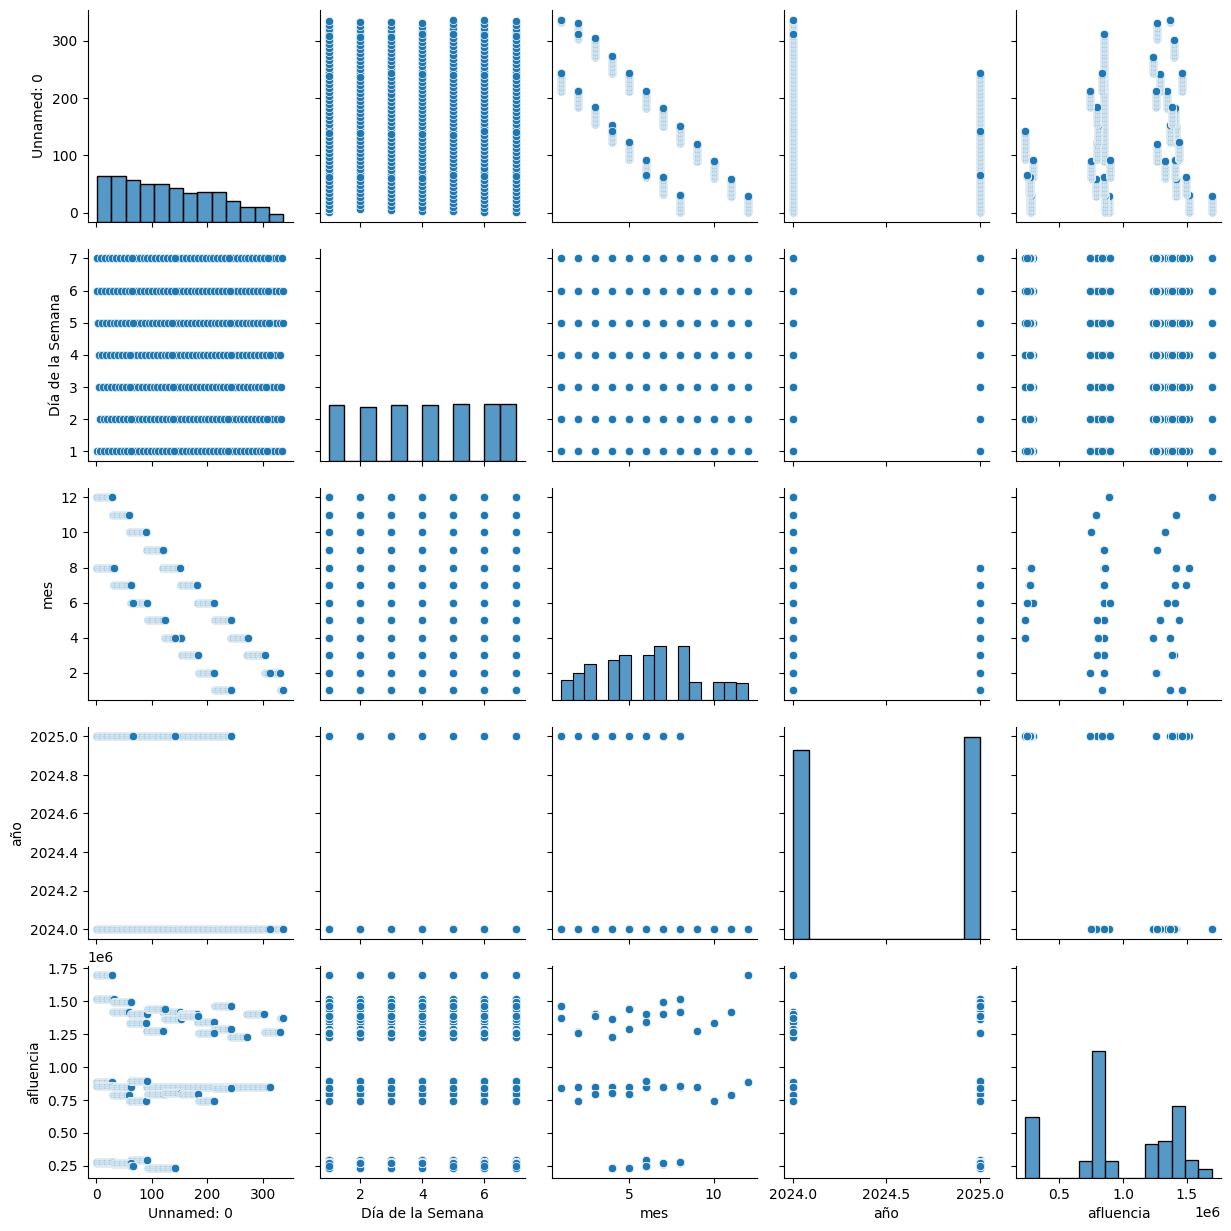

In [201]:
sns.pairplot(data=df_total)
plt.show()